# APAC-ML

El propósito de este notebook es realizar la pruebas de concepto sobre el dataset *final.csv*  y el algoritmo Random Forest. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold,StratifiedKFold
import sklearn.preprocessing as preprocessing
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit 
sns.set_palette("pastel")

### 1.- Cargar dataset

In [ ]:
df = pd.read_csv("final.csv")

Revisar la dimensión del dataframe

In [ ]:
df.shape

(511, 70)

In [ ]:
df.head(10)

,Sexo_parent,Edad,Inició el proceso de Valoración,Sexo_child,Edad (años),"Dificultad para ubicarse especialmente (arriba, abajo, adelante, atrás).",Edad al momento de realizar el test (años),"Falta de coordinación entre la succión,respiracióny deglución.",La boca permanece abierta y sale saliva.,"Le cuesta más esfuerzo realizar pequeñas acciones con las manos como insertar objetos, utilizar tijeras.",...,Gestosis (Vómitos exagerados en el embarazo),Hipertensión materna (Presión arterial alta durante el embarazo),Hipotensión (Presión arterial baja durante el embarazo),"Infecciones maternas (Virus, bacterias, parásitos y enfermedades de la piel como rubeola\n y varicela)\n",Obstruccón respitatoria (Dificultad del bebé para respirar al momento del nacimiento)\n,Parto prolongado (Más de 12 horas en labor de parto),Prematuridad (Nacimiento antes de las 37 semanas de embarazo),Radiaciones (Se realizaron estudios de Rayos X durante el embarazo),"Traumatismos (Lesión, principalmente en la cabeza)",Tumores (Presencia de “abultamientos” en alguna parte del cuerpo)
0,Femenino,34,1.0,Masculino,2,False,2,False,False,False,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,Femenino,35,1.0,Masculino,4,True,4,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Femenino,21,0.0,Masculino,4,True,4,False,False,False,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Femenino,22,0.0,Masculino,3,False,3,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Femenino,31,0.0,Masculino,4,False,4,False,False,False,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,Femenino,28,0.0,Masculino,2,False,3,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Femenino,26,0.0,Masculino,2,False,2,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,Femenino,35,0.0,Masculino,0,False,0,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Femenino,33,0.0,Masculino,2,False,2,False,False,False,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9,Femenino,36,0.0,Masculino,4,False,4,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 70 columns):
 #   Column                                                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                                                    --------------  -----  
 0   Sexo_parent                                                                                                                                               511 non-null    object 
 1   Edad                                                                                                                                                      511 non-null    int64  
 2   Inició el proceso de Valoración                                                                                                                           511 

In [ ]:
def get_encoder(index,dataset):
    """ función para codificar la columna de un dataset""" 
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(dataset.iloc[:,index].values)
    data = label_encoder.transform(dataset.iloc[:,index].values)
    return data,label_encoder

In [ ]:
df_encoded = df.copy()

Se crea una copia del dataframe original, para codificar las variables de tipo string y bool 

In [ ]:
for index,(column,column_type)  in enumerate(zip(df_encoded.columns,df_encoded.dtypes)):
    if column_type =='object' or column_type=='bool':
        encoders = get_encoder(index,df_encoded)
        df_encoded[column] = encoders[0]


In [ ]:
df_encoded.head(10)

,Sexo_parent,Edad,Inició el proceso de Valoración,Sexo_child,Edad (años),"Dificultad para ubicarse especialmente (arriba, abajo, adelante, atrás).",Edad al momento de realizar el test (años),"Falta de coordinación entre la succión,respiracióny deglución.",La boca permanece abierta y sale saliva.,"Le cuesta más esfuerzo realizar pequeñas acciones con las manos como insertar objetos, utilizar tijeras.",...,Gestosis (Vómitos exagerados en el embarazo),Hipertensión materna (Presión arterial alta durante el embarazo),Hipotensión (Presión arterial baja durante el embarazo),"Infecciones maternas (Virus, bacterias, parásitos y enfermedades de la piel como rubeola\n y varicela)\n",Obstruccón respitatoria (Dificultad del bebé para respirar al momento del nacimiento)\n,Parto prolongado (Más de 12 horas en labor de parto),Prematuridad (Nacimiento antes de las 37 semanas de embarazo),Radiaciones (Se realizaron estudios de Rayos X durante el embarazo),"Traumatismos (Lesión, principalmente en la cabeza)",Tumores (Presencia de “abultamientos” en alguna parte del cuerpo)
0,0,34,1.0,1,2,0,2,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0,35,1.0,1,4,1,4,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,21,0.0,1,4,1,4,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,22,0.0,1,3,0,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,31,0.0,1,4,0,4,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0,28,0.0,1,2,0,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,26,0.0,1,2,0,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0,35,0.0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,33,0.0,1,2,0,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9,0,36,0.0,1,4,0,4,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
target = df_encoded['Inició el proceso de Valoración']
df_encoded.groupby('Inició el proceso de Valoración').count()

,Sexo_parent,Edad,Sexo_child,Edad (años),"Dificultad para ubicarse especialmente (arriba, abajo, adelante, atrás).",Edad al momento de realizar el test (años),"Falta de coordinación entre la succión,respiracióny deglución.",La boca permanece abierta y sale saliva.,"Le cuesta más esfuerzo realizar pequeñas acciones con las manos como insertar objetos, utilizar tijeras.",Le cuesta trabajo socializar y jugar con otros niños.,...,Gestosis (Vómitos exagerados en el embarazo),Hipertensión materna (Presión arterial alta durante el embarazo),Hipotensión (Presión arterial baja durante el embarazo),"Infecciones maternas (Virus, bacterias, parásitos y enfermedades de la piel como rubeola\n y varicela)\n",Obstruccón respitatoria (Dificultad del bebé para respirar al momento del nacimiento)\n,Parto prolongado (Más de 12 horas en labor de parto),Prematuridad (Nacimiento antes de las 37 semanas de embarazo),Radiaciones (Se realizaron estudios de Rayos X durante el embarazo),"Traumatismos (Lesión, principalmente en la cabeza)",Tumores (Presencia de “abultamientos” en alguna parte del cuerpo)
Inició el proceso de Valoración,,,,,,,,,,,,,,,,,,,,,
0.0,409,409,409,409,409,409,409,409,409,409,...,409,409,409,409,409,409,409,409,409,409
1.0,102,102,102,102,102,102,102,102,102,102,...,102,102,102,102,102,102,102,102,102,102


Crear dos conjuntos de datos estratificada usando la varaible objetivo para tener datasets equilibrados 

In [ ]:
dividir = StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=1)
for eindex, pindex in dividir.split(df_encoded,df_encoded['Inició el proceso de Valoración']):
    c_train = df_encoded.loc[eindex]
    c_test = df_encoded.loc[pindex]

In [ ]:
df_encoded.drop(columns=['Inició el proceso de Valoración'],inplace=True)

In [ ]:
c_train.drop(columns=['Inició el proceso de Valoración'],inplace=True)
c_test.drop(columns=['Inició el proceso de Valoración'],inplace=True)

In [ ]:
c_train.head(10)

,Sexo_parent,Edad,Sexo_child,Edad (años),"Dificultad para ubicarse especialmente (arriba, abajo, adelante, atrás).",Edad al momento de realizar el test (años),"Falta de coordinación entre la succión,respiracióny deglución.",La boca permanece abierta y sale saliva.,"Le cuesta más esfuerzo realizar pequeñas acciones con las manos como insertar objetos, utilizar tijeras.",Le cuesta trabajo socializar y jugar con otros niños.,...,Gestosis (Vómitos exagerados en el embarazo),Hipertensión materna (Presión arterial alta durante el embarazo),Hipotensión (Presión arterial baja durante el embarazo),"Infecciones maternas (Virus, bacterias, parásitos y enfermedades de la piel como rubeola\n y varicela)\n",Obstruccón respitatoria (Dificultad del bebé para respirar al momento del nacimiento)\n,Parto prolongado (Más de 12 horas en labor de parto),Prematuridad (Nacimiento antes de las 37 semanas de embarazo),Radiaciones (Se realizaron estudios de Rayos X durante el embarazo),"Traumatismos (Lesión, principalmente en la cabeza)",Tumores (Presencia de “abultamientos” en alguna parte del cuerpo)
406,0,38,1,3,0,3,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279,0,29,1,4,1,4,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
407,0,23,1,2,0,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
22,0,34,0,4,1,4,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
460,0,28,0,1,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,1,29,1,4,0,4,0,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
137,0,35,1,2,0,2,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
363,0,30,1,0,0,0,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
367,0,33,0,2,0,2,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
260,0,31,1,1,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
c_train.groupby('Prueba aplicada').count()

,Sexo_parent,Edad,Sexo_child,Edad (años),"Dificultad para ubicarse especialmente (arriba, abajo, adelante, atrás).",Edad al momento de realizar el test (años),"Falta de coordinación entre la succión,respiracióny deglución.",La boca permanece abierta y sale saliva.,"Le cuesta más esfuerzo realizar pequeñas acciones con las manos como insertar objetos, utilizar tijeras.",Le cuesta trabajo socializar y jugar con otros niños.,...,Gestosis (Vómitos exagerados en el embarazo),Hipertensión materna (Presión arterial alta durante el embarazo),Hipotensión (Presión arterial baja durante el embarazo),"Infecciones maternas (Virus, bacterias, parásitos y enfermedades de la piel como rubeola\n y varicela)\n",Obstruccón respitatoria (Dificultad del bebé para respirar al momento del nacimiento)\n,Parto prolongado (Más de 12 horas en labor de parto),Prematuridad (Nacimiento antes de las 37 semanas de embarazo),Radiaciones (Se realizaron estudios de Rayos X durante el embarazo),"Traumatismos (Lesión, principalmente en la cabeza)",Tumores (Presencia de “abultamientos” en alguna parte del cuerpo)
Prueba aplicada,,,,,,,,,,,,,,,,,,,,,
0,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
1,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
2,69,69,69,69,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69
3,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
4,79,79,79,79,79,79,79,79,79,79,...,79,79,79,79,79,79,79,79,79,79
5,69,69,69,69,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69
6,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
7,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13


In [ ]:
c_train.index

Int64Index([406, 279, 407,  22, 460, 109, 137, 363, 367, 260,
            ...
            345, 293, 209, 286, 125,  21, 417, 227, 459, 299],
           dtype='int64', length=357)

In [ ]:
target_c_train = target.iloc[c_train.index]

In [ ]:
target_c_train.head(10)

406    0.0
279    0.0
407    0.0
22     0.0
460    1.0
109    1.0
137    0.0
363    0.0
367    0.0
260    0.0
Name: Inició el proceso de Valoración, dtype: float64

In [ ]:
target_c_test = target.iloc[c_test.index]

In [ ]:
target_c_test.head(10)

317    0.0
399    0.0
161    0.0
210    1.0
430    0.0
274    0.0
415    1.0
328    0.0
250    0.0
474    0.0
Name: Inició el proceso de Valoración, dtype: float64

Creamos el primer el modelo Random Forest 

In [ ]:
rf = RandomForestClassifier(
    criterion='gini',
    n_estimators=50,
    max_depth=4,
    max_features=12,
    min_samples_split=4,
    random_state=100,
)

In [ ]:
rf.fit(c_train,target_c_train)

RandomForestClassifier(max_depth=4, max_features=12, min_samples_split=5,
                       n_estimators=80, random_state=100)

In [ ]:
y_test_predicted_rf = rf.predict(c_test)
y_train_predictec_rf =  rf.predict(c_train)

In [ ]:
print("Accuracy test %.2f" % accuracy_score(target_c_test,y_test_predicted_rf))
print("Accuracy train %.2f" % accuracy_score(target_c_train,y_train_predictec_rf))

Accuracy test 0.80
Accuracy train 0.80


              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89       123
         1.0       0.00      0.00      0.00        31

    accuracy                           0.80       154
   macro avg       0.40      0.50      0.44       154
weighted avg       0.64      0.80      0.71       154

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.

In [ ]:
rf2 = RandomForestClassifier(
    criterion='gini',
    n_estimators=50,
    max_depth=4,
    max_features=12,
    min_samples_split=4,
    random_state=100,
)

In [ ]:
rf2.fit(c_train,target_c_train)

RandomForestClassifier(max_depth=4, max_features=12, min_samples_split=4,
                       n_estimators=50, random_state=100)

In [ ]:
y_test_predicted_rf2 = rf2.predict(c_test)
y_train_predictec_rf2 =  rf2.predict(c_train)

In [ ]:
print("Accuracy test %.2f"%accuracy_score(target_c_test,y_test_predicted_rf2))
print("Accuracy train %.2f"%accuracy_score(target_c_train,y_train_predictec_rf2))

Accuracy test 0.80
Accuracy train 0.80


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_score = cross_val_score(rf,c_train,target_c_train,cv=15)

In [ ]:
avg = cv_score.mean()

In [ ]:
rf.fit(c_train,target_c_train)

RandomForestClassifier(max_depth=4, max_features=12, min_samples_split=4,
                       n_estimators=50, random_state=100)

In [ ]:
test_accuracy = rf2.score(c_test, target_c_test)

In [ ]:
print("Promedio de precisión en validación cruzada:", avg)
print("Precisión en los datos de prueba:", test_accuracy)

Promedio de precisión en validación cruzada: 0.7957729468599033
Precisión en los datos de prueba: 0.7987012987012987


In [ ]:
print(classification_report(target_c_test,y_test_predicted_rf2))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89       123
         1.0       0.00      0.00      0.00        31

    accuracy                           0.80       154
   macro avg       0.40      0.50      0.44       154
weighted avg       0.64      0.80      0.71       154

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.

In [ ]:
cm_train = confusion_matrix(target_c_test,y_test_predicted_rf2)

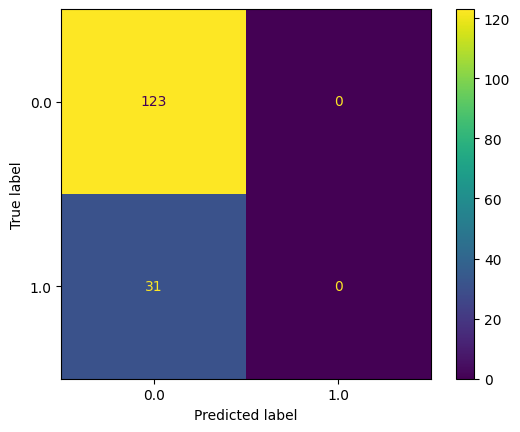

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=rf2.classes_)
disp.plot()

In [ ]:
y_test_predicted_rf2 = rf.predict(c_test)
print(classification_report(target_c_test,y_test_predicted_rf2))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89       123
         1.0       0.00      0.00      0.00        31

    accuracy                           0.80       154
   macro avg       0.40      0.50      0.44       154
weighted avg       0.64      0.80      0.71       154

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.

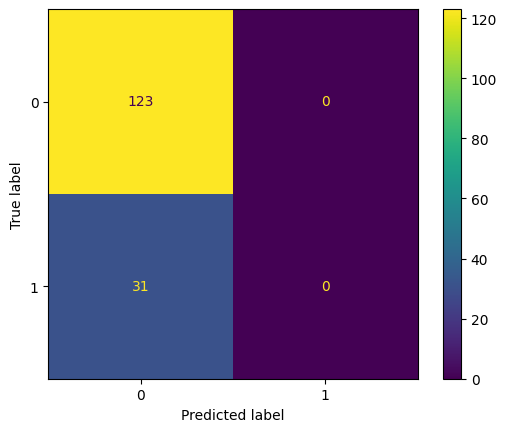

In [ ]:
cm_train = confusion_matrix(target_c_test,y_test_predicted_rf2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train) #display_labels=tree_model.classes_)
disp.plot()

In [ ]:
import joblib

In [ ]:
joblib.dump(rf2,"atencion_prevencion_rf_mode.pkl")

['atencion_prevencion_rf_mode.pkl']

In [ ]:
import sklearn

In [ ]:
sklearn.show_versions()


System:
    python: 3.9.16 (main, May  3 2023, 09:59:09)  [GCC 8.3.0]
executable: /usr/local/bin/python
   machine: Linux-5.4.249-163.359.amzn2.x86_64-x86_64-with-glibc2.28

Python dependencies:
      sklearn: 1.1.2
          pip: 22.0.4
   setuptools: 58.1.0
        numpy: 1.23.4
        scipy: 1.9.3
       Cython: None
       pandas: 1.2.5
   matplotlib: 3.6.0
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
         prefix: libopenblas
       filepath: /shared-libs/python3.9/py/lib/python3.9/site-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so
        version: 0.3.20
threading_layer: pthreads
   architecture: Zen
    num_threads: 4

       user_api: blas
   internal_api: openblas
         prefix: libopenblas
       filepath: /shared-libs/python3.9/py/lib/python3.9/site-packages/scipy.libs/libopenblasp-r0-41284840.3.18.so
        version: 0.3.18
threading_layer: pthreads
   architecture: Z

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6ea83981-6c5c-4dd4-a8fa-279fd15187eb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>